In [7]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [149]:
plt.rcParams["figure.figsize"] = (8,6)

In [244]:
mu_0 = 8.854187 * 10**(-12) # Vacuum permittivity
mu_1 = -12 # Magnetic moment of da big magnet
M_2 = 568191 # Magnetization of da small magnet
L = 0.1 # Magnet length
D = 0.01 # Magnet diameter
theta = np.radians(20) # Angle of inclination
h = 16 * 10**(-3) # Distance between magnets

In [245]:
def force_two_magnets(r, alpha, beta, m_1, m_2):
    force_magnitude = -3 * 10**-7 * (m_1 * m_2) * r**-4
    force_radial = force_magnitude * (2 * np.cos(alpha) * np.cos(alpha - beta) - np.sin(alpha) * np.sin(alpha - beta))
    force_angular = force_magnitude * np.sin(2 * alpha - beta)

    return force_radial, force_angular

def infinitesimal_magn_moment(d):
    return 2 * M_2 * L * np.sqrt(D**2 / 4 - (d - D/2)**2)

def dipole_position(d):
    return [D/2 - d*np.cos(theta), -d*np.sin(theta)]

def magnet_torque(d):
    x_dipole, y_dipole = dipole_position(d)
    dipole_dist = np.hypot(x_dipole, y_dipole-h)
    dipole_angle = np.arctan2(x_dipole, -(y_dipole - h))
    F_r, F_theta = force_two_magnets(dipole_dist, dipole_angle, theta, mu_1, infinitesimal_magn_moment(d))
    torque = (F_r * np.cos(dipole_angle) - F_theta * np.sin(dipole_angle)) * d * np.cos(theta)

    return torque

In [243]:
force = quad(magnet_torque, 0, D)
force

(0.03976680497811749, 6.454768664010402e-11)

In [368]:
x = np.linspace(-0.02, 0.02, 100)
y = np.linspace(-0.02, 0.02, 100)
X, Y = np.meshgrid(x, y)
r, phi = np.hypot(X, Y), np.arctan2(Y, X)

In [369]:
F_r, F_phi = force_two_magnets(r, phi, 0, 10, 1)

(-0.02, 0.02)

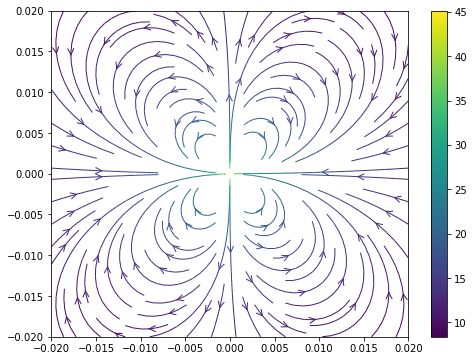

In [377]:
Fx = F_r * np.cos(phi) - F_phi * np.sin(phi)
Fy = F_r * np.sin(phi) + F_phi * np.cos(phi)

color = 2 * np.log(np.hypot(Fx, Fy))
plt.streamplot(x, y, Fx, Fy, color=color, linewidth=1, density=1, arrowstyle='->', arrowsize=1.5)
plt.colorbar()
plt.xlim(-0.02, 0.02)
plt.ylim(-0.02, 0.02)